In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df = pd.read_csv("/Users/liusihanyan/Documents/434/group project/uber_dataset.csv")

# 处理时间格式
df['dateSurvey'] = pd.to_datetime(df['dateSurvey'])

# 创建 panel 索引：agency × date
df['agency_id'] = df['agency'].astype('category').cat.codes  # 数字编码 agency
df.set_index(['agency_id', 'dateSurvey'], inplace=True)

# 重置数据用于可视化
df_reset = df.reset_index()

df_reset.head()

,agency_id,dateSurvey,Unnamed: 0,UPTTotal,treatUberX,treatGTNotStd,popestimate,employment,aveFareTotal,VRHTotal,VOMSTotal,VRMTotal,gasPrice,agency,city,state
0,335,2004-01-01,0,8296756,0.0,0.00,3163703,1572859,0.778015,333329.0,2626.0,4740396.0,1.701,King County Department of Transportation - Met...,Seattle,WA
1,335,2004-02-01,1,7847113,0.0,1.40,3163703,1581307,0.778015,310535.0,2626.0,4398939.0,1.862,King County Department of Transportation - Met...,Seattle,WA
2,335,2004-03-01,2,9011399,0.0,3.00,3163703,1592152,0.778015,356761.0,2626.0,5176183.0,2.063,King County Department of Transportation - Met...,Seattle,WA
3,335,2004-04-01,3,8656389,0.0,2.25,3163703,1598167,0.778015,341191.0,2626.0,4889387.0,2.121,King County Department of Transportation - Met...,Seattle,WA
4,335,2004-05-01,4,8378406,0.0,2.60,3163703,1593356,0.778015,333418.0,2626.0,4747018.0,2.266,King County Department of Transportation - Met...,Seattle,WA


| Variable Name   | Description                                                                                                        |
| --------------- | ------------------------------------------------------------------------------------------------------------------ |
| `UPTTotal`      | **Unlinked Passenger Trips Total** – Total number of public transit rides provided by the agency in a given month  |
| `treatUberX`    | **Uber Presence Indicator** – Binary variable equal to 1 if Uber was operating in the city that month, 0 otherwise |
| `treatGTNotStd` | **Google Trends Index** – Continuous measure of Uber presence based on search intensity in the MSA                 |
| `popestimate`   | **Population Estimate** – Estimated population of the Metropolitan Statistical Area (MSA)                          |
| `employment`    | **Employment Level** – Total number of employed individuals in the MSA                                             |
| `aveFareTotal`  | **Average Fare** – Average fare charged per trip by the public transit agency                                      |
| `VRHTotal`      | **Vehicle Revenue Hours** – Total number of hours transit vehicles are in revenue service                          |
| `VOMSTotal`     | **Vehicles Operated in Maximum Service** – Number of transit vehicles operated during peak service                 |
| `VRMTotal`      | **Vehicle Revenue Miles** – Total distance covered by revenue-generating transit vehicles                          |
| `gasPrice`      | **Gasoline Price** – Average price of gasoline in the MSA that month                                               |
| `agency`        | **Transit Agency Name** – Name of the public transportation provider                                               |
| `city`          | **City** – City in which the transit agency operates                                                               |
| `state`         | **State** – U.S. state abbreviation                                                                                |
| `dateSurvey`    | **Date** – Date of observation (monthly frequency, e.g., 2015-03-01)                                               |


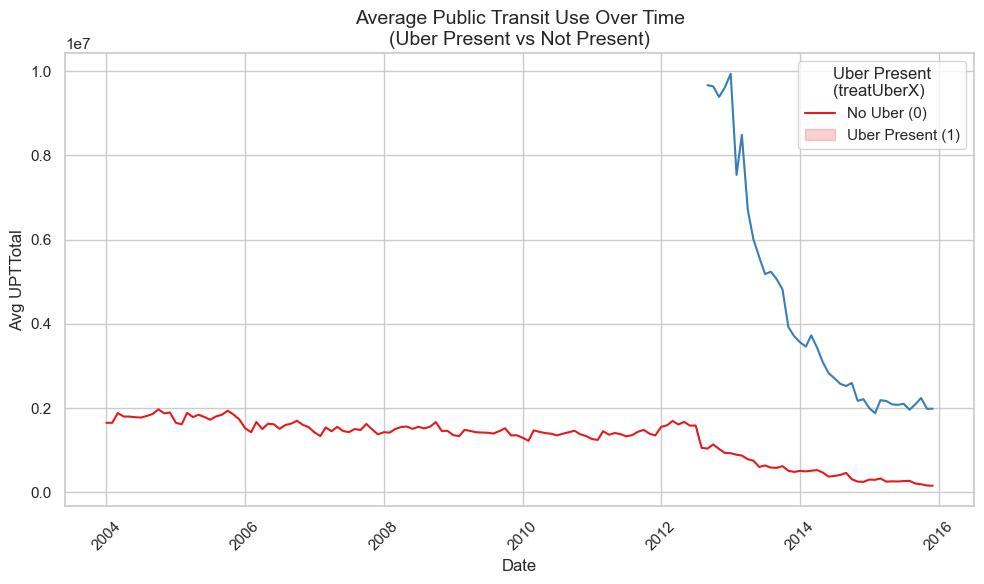

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 为提升可读性，限制 Uber 是否进入为 0 和 1（避免中间小数值造成图像混乱）
filtered_df = df_reset[df_reset['treatUberX'].isin([0.0, 1.0])]

# 重新按时间和 Uber presence 分组
clean_trend = filtered_df.groupby(['dateSurvey', 'treatUberX'])['UPTTotal'].mean().reset_index()

# 绘图
plt.figure(figsize=(10, 6))
sns.lineplot(data=clean_trend, x='dateSurvey', y='UPTTotal', hue='treatUberX', palette='Set1')

plt.title('Average Public Transit Use Over Time\n(Uber Present vs Not Present)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Avg UPTTotal')
plt.xticks(rotation=45)
plt.legend(title='Uber Present\n(treatUberX)', labels=['No Uber (0)', 'Uber Present (1)'])
plt.tight_layout()
plt.show()


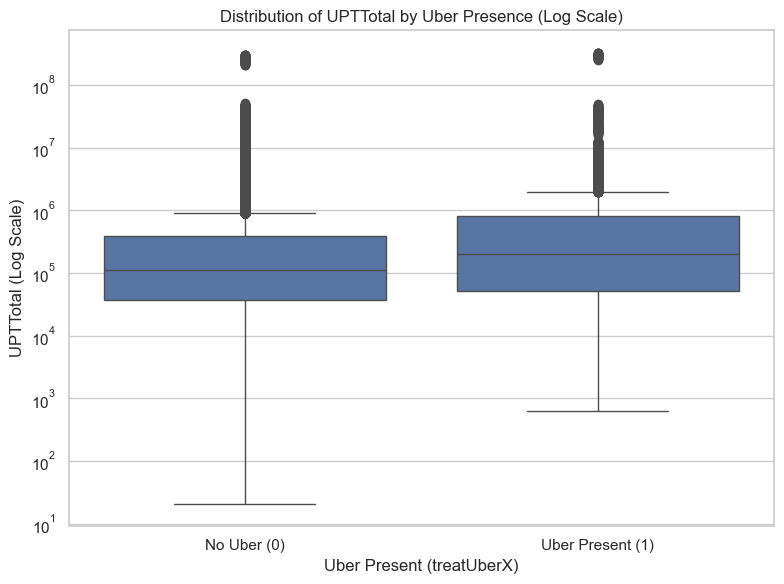

In [28]:
# 筛选 treatUberX 为 0 或 1，避免 x 轴太多小数导致混乱
filtered_df = df_reset[df_reset['treatUberX'].isin([0.0, 1.0])]

# 使用对数缩放 y 轴，以应对极端值
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_df, x='treatUberX', y='UPTTotal')
plt.yscale('log')
plt.title('Distribution of UPTTotal by Uber Presence (Log Scale)')
plt.xlabel('Uber Present (treatUberX)')
plt.ylabel('UPTTotal (Log Scale)')
plt.xticks([0, 1], ['No Uber (0)', 'Uber Present (1)'])
plt.tight_layout()
plt.show()

In [22]:
# 3️⃣ 总体描述性统计
summary_table = df_reset[['UPTTotal', 'employment', 'aveFareTotal', 'VRHTotal', 'VRMTotal', 'gasPrice']].describe().T
print(summary_table)

                count          mean           std           min  \
UPTTotal      76213.0  1.557973e+06  1.247141e+07     21.000000   
employment    76213.0  1.544130e+06  2.363277e+06  32150.000000   
aveFareTotal  72016.0  1.766518e+00  4.134002e+00      0.000026   
VRHTotal      76020.0  4.040557e+04  1.589262e+05     40.000000   
VRMTotal      76032.0  6.165114e+05  2.326701e+06    274.000000   
gasPrice      76213.0  2.980399e+00  6.534122e-01      1.541000   

                        25%            50%           75%           max  
UPTTotal       38660.000000  121473.000000  4.169980e+05  3.227260e+08  
employment    131435.000000  390381.000000  1.891851e+06  9.357873e+06  
aveFareTotal       0.651672       0.914369  1.427222e+00  1.358490e+02  
VRHTotal        4076.750000    8701.000000  2.191775e+04  3.370515e+06  
VRMTotal       62930.750000  135180.000000  3.456725e+05  4.548309e+07  
gasPrice           2.471000       2.970000  3.563000e+00  4.423000e+00  


In [24]:
# 4️⃣ 分组描述性统计
grouped_stats = df_reset.groupby('treatUberX')['UPTTotal'].describe()
print(grouped_stats)

              count          mean           std       min        25%  \
treatUberX                                                             
0.000000    66463.0  1.373255e+06  1.108981e+07      21.0   37446.00   
0.032258        8.0  5.922881e+05  8.237364e+05   32448.0  102267.00   
0.033333       12.0  6.566633e+05  1.072748e+06    9108.0   89065.50   
0.064516        3.0  2.597600e+05  1.472749e+05  107386.0  188969.00   
0.096774        7.0  4.477713e+05  4.507303e+05   15656.0  179415.00   
0.129032       30.0  4.302851e+05  8.850606e+05    3468.0   25124.50   
0.133333        3.0  8.583533e+05  1.468595e+06    9628.0   10460.00   
0.142857        4.0  3.714112e+05  7.266507e+05    4290.0    6579.75   
0.161290        8.0  7.618718e+05  1.230042e+06   12945.0  152107.00   
0.166667       19.0  8.497662e+05  2.350171e+06   13805.0  111126.00   
0.193548        3.0  1.234670e+05  1.949338e+05    2113.0   11040.00   
0.233333       17.0  9.408777e+05  2.082447e+06   20490.0   3945